(63, 31)
0     250.493720
1      43.643017
2     147.971892
3      27.917580
4      10.174996
         ...    
58     38.546437
59     47.553222
60     31.054040
61     11.801031
62     14.340096
Name: y, Length: 63, dtype: float64
0
(63, 5)


/home/max/mambaforge/envs/jax_numpyro_env/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

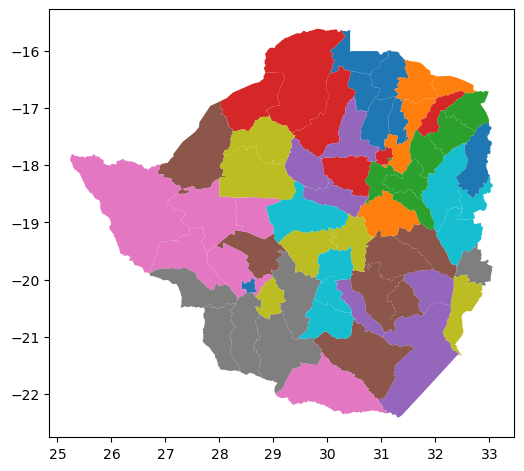

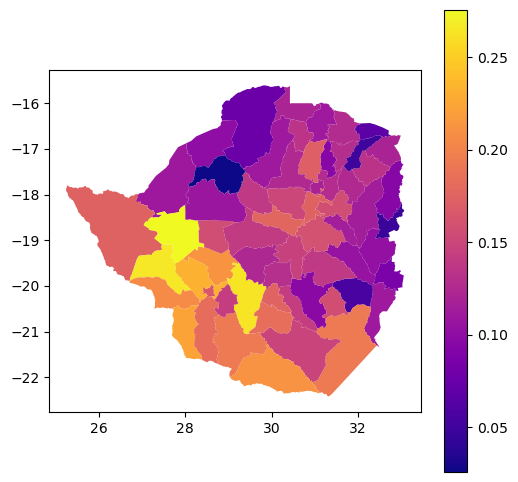

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt 
import jax.numpy as jnp
import numpy as onp

s = gpd.read_file("data/zwe2016phia.geojson")
print(s.shape)
print(s.y)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
#divider = make_axes_locatable(ax)
s.plot(column='area_id', ax=ax, legend=False)



s = s[['area_id', 'geometry', 'y', 'n_obs', 'estimate']]
s['y'] = round(s['y']).astype(int)
s['n_obs'] = round(s['n_obs']).astype(int)
print(onp.sum(onp.isnan(s['n_obs'])))
print(s.shape)

fig, ax = plt.subplots(1, 1, figsize=(6,6))
#divider = make_axes_locatable(ax)
s.plot(column='estimate', ax=ax, legend=True, cmap='plasma')

In [16]:
print(A)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


In [23]:
s["geometry"].estimate_utm_crs()

<Derived Projected CRS: EPSG:32735>
Name: WGS 84 / UTM zone 35S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 24°E and 30°E, southern hemisphere between 80°S and equator, onshore and offshore. Botswana. Burundi. Democratic Republic of the Congo (Zaire). Rwanda. South Africa. Tanzania. Uganda. Zambia. Zimbabwe.
- bounds: (24.0, -80.0, 30.0, 0.0)
Coordinate Operation:
- name: UTM zone 35S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
temp_centroids = s["geometry"].to_crs("EPSG:32735").centroid
centroids = gpd.GeoDataFrame()
centroids["x"] = temp_centroids.geometry.apply(lambda x: x.x)
centroids["y"] = temp_centroids.geometry.apply(lambda x: x.y)
x = jnp.array(centroids["x"])
y= jnp.array(centroids["y"])
x = x - jnp.mean(x)
y = y- jnp.mean(y)
coords = jnp.dstack((x,y))[0]
print(coords)

[[-1.94793562e+05 -1.42415500e+05]
 [ 7.29439375e+04  8.68390000e+04]
 [ 7.19150000e+04  1.06201500e+05]
 [ 1.54036000e+05 -7.44585000e+04]
 [ 2.42696500e+05 -1.14443000e+05]
 [ 2.14168125e+05 -1.92449000e+05]
 [ 1.90758562e+05  4.52550000e+04]
 [ 2.14082750e+05 -5.11645000e+04]
 [ 2.45572875e+05  1.27660000e+04]
 [ 2.53208250e+05  9.06050000e+04]
 [ 1.00966812e+05  1.71402500e+05]
 [ 8.53100625e+04  2.62710500e+05]
 [ 3.28260000e+04  2.35098000e+05]
 [ 6.08178125e+04  1.71657000e+05]
 [ 1.91135000e+04  2.98103000e+05]
 [ 1.39296000e+05  2.45356000e+05]
 [ 2.07990375e+05  2.39573000e+05]
 [ 1.36581375e+05  1.87400000e+05]
 [ 7.51351875e+04 -1.04755000e+04]
 [ 1.02563875e+05  1.11436000e+05]
 [ 1.31663625e+05  5.33450000e+03]
 [ 1.18514438e+05  5.74085000e+04]
 [ 2.43399625e+05  1.91575500e+05]
 [ 1.54109875e+05  1.09024000e+05]
 [ 2.03330000e+05  1.46850000e+05]
 [ 6.10436250e+04  6.10085000e+04]
 [ 1.79802562e+05  1.87805500e+05]
 [ 2.03200000e+03  7.42640000e+04]
 [-8.64301875e+04  2

Index(['geometry', 'draw0', 'draw1', 'draw2', 'draw3', 'draw4', 'draw5',
       'draw6', 'draw7', 'draw8'],
      dtype='object')
0 0 0
0 1 3
0 2 6
1 0 1
1 1 4
1 2 7
2 0 2
2 1 5
2 2 8


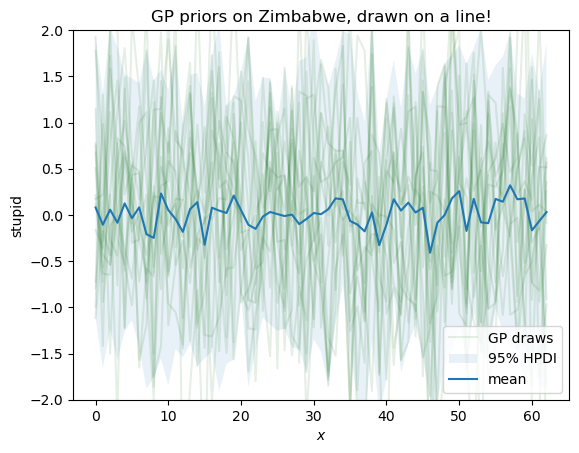

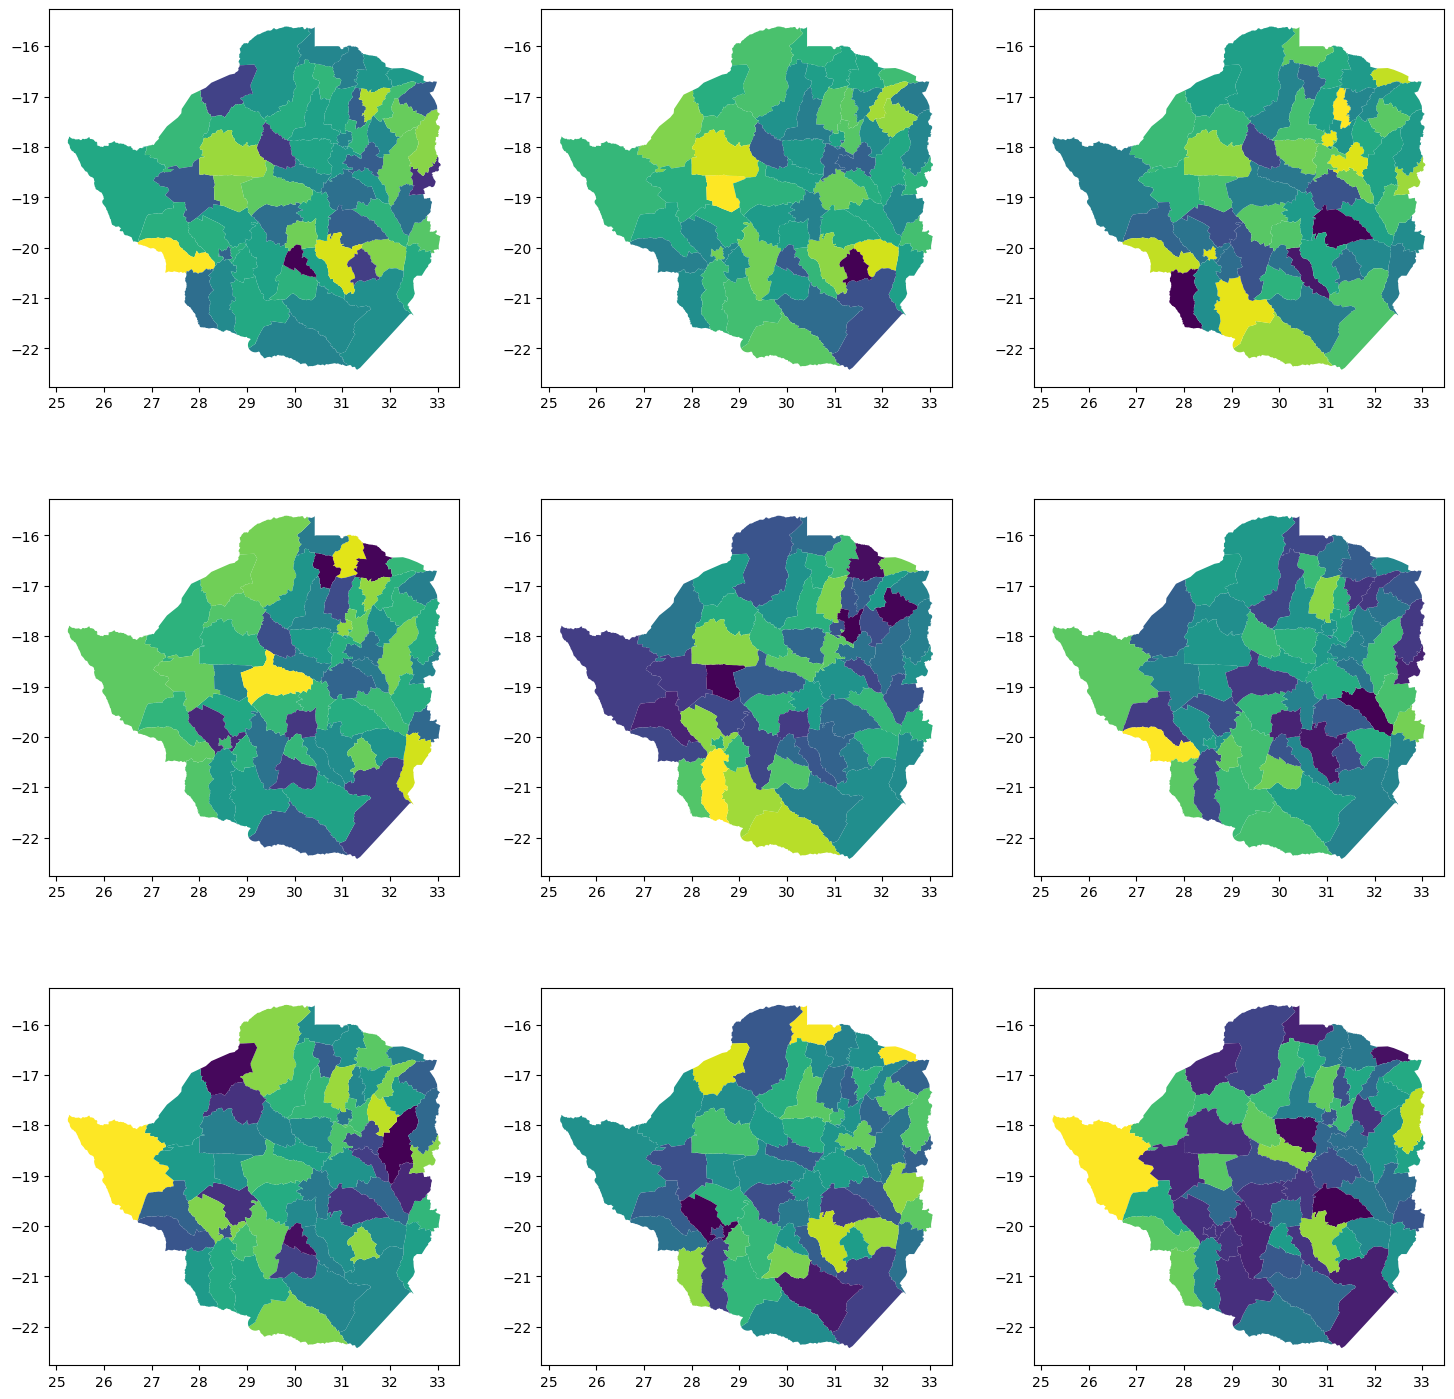

In [40]:
from reusable.gp import OneDGP
from plotting.plots import plot_2d_draws, plot_draws_hpdi
from jax import random
from numpyro.infer import Predictive
from reusable.kernels import esq_kernel

rng_key = random.PRNGKey(3)

rng_key, rng_key_plots = random.split(rng_key, 2)

to_plot = 50

plot_pred = Predictive(OneDGP, num_samples=to_plot)
plot_samples = plot_pred(rng_key_plots, x=coords, gp_kernel=esq_kernel, jitter=5e-5)

#plot_2d_draws(plot_samples["y"].reshape(-1, *([args["n"]] * args["dim"])), to_plot, 3, "2D GP draws")

plot_draws_hpdi(plot_samples["y"], jnp.arange(0, coords.shape[0]), "GP priors on Zimbabwe, drawn on a line!", "stupid")



r = 3
c = 3

newframe = gpd.GeoDataFrame(geometry=s["geometry"])
for i in range(r* c):
    newframe[f"draw{i}"] = plot_samples["y"][i]
fig, ax = plt.subplots(r, c, figsize=(6 * c,6 * r))

print(newframe.columns)

for i in range(r):
    for j in range(c):
        print(i,j, i + r* j)
        newframe.plot(column=f'draw{i+ r * j}', ax=ax[i,j], legend=False)


In [41]:
coords.shape

(63, 2)

In [45]:
flat_dists = jnp.array(temp_centroids.geometry.apply(lambda g: temp_centroids.distance(g))).ravel()

In [59]:
print(flat_dists/1e6)

[0.         0.35247838 0.36461464 ... 0.05206751 0.05917303 0.        ]


-1.3418452 0.21973312


(array([1.15874577, 0.03678558, 0.18392792, 0.47821247, 1.2139243 ,
        1.39785222, 1.69213598, 1.54499456, 2.17034951, 1.72892249,
        2.02320717, 2.31749185, 2.09677606, 2.46463419, 2.50141977,
        2.24392068, 1.65535132, 3.01641796, 2.42784596, 2.75892187,
        2.1335616 , 2.09678062, 2.4646315 , 2.09678062, 2.57498814,
        2.39106042, 1.87606687, 1.94963388, 2.13356624, 1.65534952,
        1.91285249, 1.87606279, 1.50821062, 1.54499288, 1.36106516,
        1.21392562, 1.17713744, 0.91963862, 1.02999974, 0.69892535,
        0.84606753, 0.3310699 , 0.55178317, 0.47821416, 0.29428436,
        0.25749881, 0.18392772, 0.07357141, 0.14714218, 0.11035663]),
 array([0.        , 0.01369845, 0.02739689, 0.04109534, 0.05479378,
        0.06849223, 0.08219067, 0.09588912, 0.10958757, 0.12328601,
        0.13698445, 0.1506829 , 0.16438134, 0.1780798 , 0.19177824,
        0.20547669, 0.21917513, 0.23287357, 0.24657202, 0.26027048,
        0.27396891, 0.28766736, 0.30136579, 0.

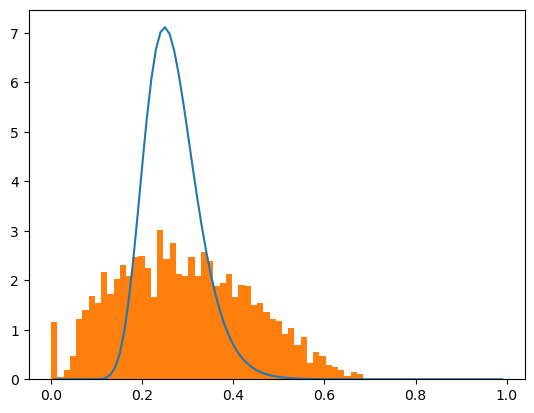

In [74]:
mean = jnp.mean(flat_dists/1e6)
var = jnp.var(flat_dists/1e6)
mu = jnp.log(mean / jnp.sqrt(1+var / mean **2))
sigma = jnp.log(1+var / mean ** 2)
print(mu, sigma)
import math
c = math.sqrt(2 * math.pi)

def f(x):
    return 1 / ( x * sigma * c ) * jnp.exp(- 1 / (2 * sigma * sigma) * (jnp.log(x) - mu) ** 2)

xaxis = jnp.arange(0, 1, 0.01)

plt.plot(xaxis, f(xaxis))
plt.hist(flat_dists/1000_000, bins=50, density=True)

(array([1., 2., 1., 2., 3., 6., 2., 4., 5., 1., 5., 3., 4., 4., 4., 3., 6.,
        1., 5., 1.]),
 array([-0.34272099, -0.31067979, -0.2786386 , -0.24659738, -0.21455619,
        -0.182515  , -0.15047379, -0.11843259, -0.08639139, -0.05435019,
        -0.02230899,  0.00973221,  0.04177341,  0.07381461,  0.10585581,
         0.13789701,  0.16993821,  0.2019794 ,  0.23402061,  0.26606181,
         0.298103  ]),
 <BarContainer object of 20 artists>)

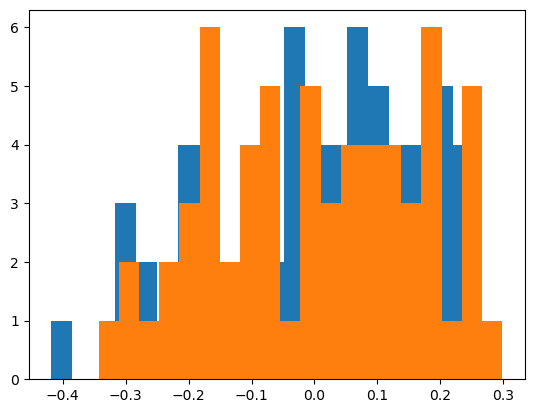

In [57]:
plt.hist(x/1000_000, bins=20)
plt.hist(y/1000_000, bins=20)

In [77]:
onp.array(flat_dists/1e6).tofile("dists.csv", sep=",")